In [1]:

%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

from   sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
df_completo = pd.read_csv("..\\Dados\\economic_r_index.csv", sep=";")
df_completo.head()

,Economic_Resilience_Index,Country,Fiscal_space,Monetary_policy_space,low-carbon_economy,Insurance_penetration,Financial_Market_development,Human_capital,Economic_complexity,Labour_market_efficiency,Banking_industry_backdrop,Macroeconomic_Resilience_index,Year
0,1,Switzerland,1.00,0.08,1.00,0.70,1.00,0.83,1.00,0.92,1.00,0.84,2019
1,2,Canada,0.99,0.17,0.44,0.62,1.00,0.93,0.45,0.95,0.88,0.81,2019
2,3,Finland,0.99,0.08,0.66,0.91,0.88,1.00,0.83,1.00,0.73,0.80,2019
3,4,United States,0.96,0.17,0.40,1.00,1.00,0.82,0.85,0.79,1.00,0.80,2019
4,5,Norway,0.99,0.16,1.00,0.29,0.73,0.73,0.37,0.89,0.81,0.76,2019


In [3]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Economic_Resilience_Index       403 non-null    int64  
 1   Country                         403 non-null    object 
 2   Fiscal_space                    403 non-null    float64
 3   Monetary_policy_space           403 non-null    float64
 4   low-carbon_economy              403 non-null    float64
 5   Insurance_penetration           403 non-null    float64
 6   Financial_Market_development    403 non-null    float64
 7   Human_capital                   403 non-null    float64
 8   Economic_complexity             403 non-null    float64
 9   Labour_market_efficiency        403 non-null    float64
 10  Banking_industry_backdrop       403 non-null    float64
 11  Macroeconomic_Resilience_index  403 non-null    float64
 12  Year                            403 

In [4]:
df_completo.isnull().any()

Economic_Resilience_Index         False
Country                           False
Fiscal_space                      False
Monetary_policy_space             False
low-carbon_economy                False
Insurance_penetration             False
Financial_Market_development      False
Human_capital                     False
Economic_complexity               False
Labour_market_efficiency          False
Banking_industry_backdrop         False
Macroeconomic_Resilience_index    False
Year                              False
dtype: bool

In [5]:

evaluation = pd.DataFrame(
    {
        "Model": [],
        "Details": [],
        "Root Mean Squared Error (RMSE)": [],
        "R-squared (training)": [],
        "Adjusted R-squared (training)": [],
        "R-squared (test)": [],
        "Adjusted R-squared (test)": [],
        "5-Fold Cross Validation": []
    }
)

In [6]:
def adjusted_r2(r2, n, k):
    return r2 - (n - 1) * (1 - r2) / (n - k - 1)

In [30]:
train_data, test_data = train_test_split(df_completo, train_size=0.7, random_state=2)

independent_var = ["Financial_Market_development", 
                   "low-carbon_economy",  
                   "Economic_complexity", 
                   "Labour_market_efficiency", 
                   "Banking_industry_backdrop",
                   #"Fiscal_space", 
                   "Monetary_policy_space" ,
                   #"Human_capital"
                  ]
lin_reg = LinearRegression()
lin_reg.fit(train_data[independent_var], train_data["Insurance_penetration"])

print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficients: {lin_reg.coef_}")

Intercept: 0.25179543094752965
Coefficients: [ 0.17652018 -0.18078808  0.3132374   0.12528609  0.2340133  -0.49939271]


In [21]:
pred = lin_reg.predict(test_data[independent_var])

In [22]:
rmse = metrics.mean_squared_error(test_data["Insurance_penetration"], pred)
r2_train = lin_reg.score(train_data[independent_var], train_data["Insurance_penetration"])
ar2_train = adjusted_r2(
    r2_train,
    train_data.shape[0],
    len(independent_var)
)

r2_test = lin_reg.score(test_data[independent_var], test_data["Insurance_penetration"])
ar2_test = adjusted_r2(
    r2_test,
    test_data.shape[0],
    len(independent_var)
)

cross_val = cross_val_score(lin_reg, df_completo[independent_var], df_completo["Insurance_penetration"], cv=5).mean()

r = evaluation.shape[0]
evaluation.loc[r] = ["Multiple Linear Regression-1", "Selected features", rmse, r2_train, ar2_train, r2_test, ar2_test, cross_val]
evaluation.sort_values(by="5-Fold Cross Validation", ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Multiple Linear Regression-1,Selected features,0.072861,0.478316,-0.054751,0.369687,-0.293800,0.428154
1,Multiple Linear Regression-1,Selected features,0.073707,0.481129,-0.050999,0.362374,-0.314751,0.426660
0,Multiple Linear Regression-1,Selected features,0.074468,0.483387,-0.048364,0.355789,-0.334437,0.422711


In [23]:

# Retorna um array de zeros com o mesmo shape e tipo do array dado
mask = np.zeros_like(df_completo.corr(), dtype=bool)

# Retorna os índices apenas do triângulo superior do array
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

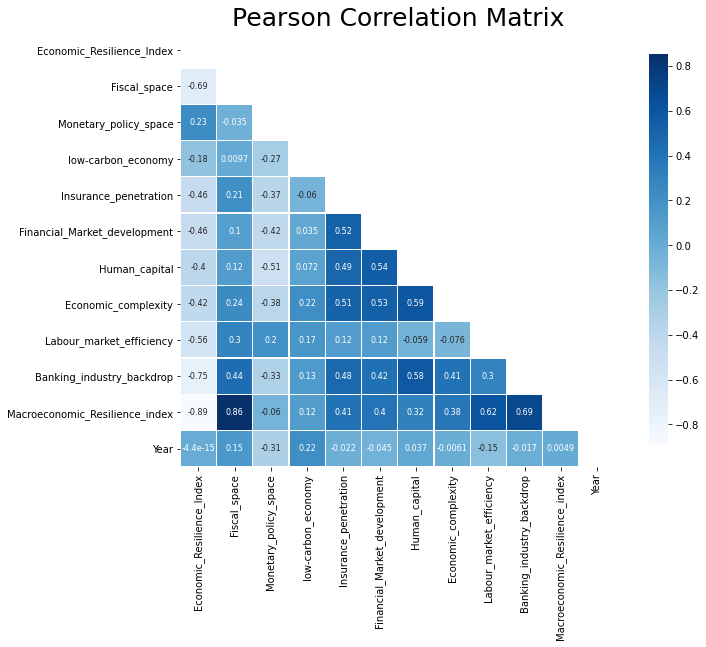

In [24]:
plt.subplots(figsize=(12, 8))
plt.title("Pearson Correlation Matrix", fontsize=25)

sns.heatmap(
    df_completo.corr(),
    linewidths=0.25,
    square=True,
    cmap="Blues",
    linecolor="w",
    annot=True,
    annot_kws={"size": 8},
    mask=mask,
    cbar_kws={"shrink": 0.9}
)

In [26]:
X = np.column_stack((df_completo['Financial_Market_development'], 
                     df_completo['low-carbon_economy'], 
                     df_completo['Economic_complexity'], 
                     df_completo['Labour_market_efficiency'], 
                     df_completo['Banking_industry_backdrop'],
                     #df_completo['Human_capital'], 
                     df_completo['Monetary_policy_space'] 
                     #df_completo['Fiscal_space'] 
                    ))
y = df_completo['Insurance_penetration']


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                              OLS Regression Results                             
Dep. Variable:     Insurance_penetration   R-squared:                       0.457
Model:                               OLS   Adj. R-squared:                  0.449
Method:                    Least Squares   F-statistic:                     55.62
Date:                   Mon, 01 Nov 2021   Prob (F-statistic):           1.15e-49
Time:                           10:09:30   Log-Likelihood:                -13.411
No. Observations:                    403   AIC:                             40.82
Df Residuals:                        396   BIC:                             68.82
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3185 

In [13]:
["Fiscal_space", "Monetary_policy_space", "Financial_Market_development", "Human_capital", 
                   "Economic_complexity", "Labour_market_efficiency", "Banking_industry_backdrop"
 
 df_completo['Fiscal_space'], df_completo['Human_capital'],

SyntaxError: invalid syntax (<ipython-input-13-316361db083c>, line 4)

In [ ]:
cross_val_score(lin_reg, df_completo[independent_var], df_completo["Insurance_penetration"], cv=5)